In [1]:
import numpy as np
import math

# Griewank function for fitness evaluation
def griewank_function(x):
    n = len(x)
    sum_sq = sum([(x[i] ** 2) / 4000 for i in range(n)])
    prod_cos = 1
    for i in range(n):
        prod_cos *= math.cos(x[i] / math.sqrt(i+1))
    return 1 + sum_sq - prod_cos

In [15]:
def generate_quantum_genes(num_genes):
    quantum_population = []
    for _ in range(num_genes):
        gene_center = np.random.uniform(-20, 20)  # Generate a random number
        gene_start = gene_center - 0.5  # Calculate the start of the interval
        gene_end = gene_center + 0.5  # Calculate the end of the interval
        quantum_population.append(((gene_start, gene_end), (0, 0.25)))
    return quantum_population

# Example usage
num_genes = 10
quantum_population = generate_quantum_genes(num_genes)
print("Quantum Population (Qubits with intervals of length 1):")
for i, gene in enumerate(quantum_population):
    print(f"Gene {i+1}: Interval: ({gene[0]}, {gene[1]})")

Quantum Population (Qubits with intervals of length 1):
Gene 1: Interval: ((-13.049523892262734, -12.049523892262734), (0, 0.25))
Gene 2: Interval: ((8.898596418263892, 9.898596418263892), (0, 0.25))
Gene 3: Interval: ((-11.83891547847028, -10.83891547847028), (0, 0.25))
Gene 4: Interval: ((-7.559323286152225, -6.559323286152225), (0, 0.25))
Gene 5: Interval: ((-3.4249165573637796, -2.4249165573637796), (0, 0.25))
Gene 6: Interval: ((-8.983035062572664, -7.9830350625726645), (0, 0.25))
Gene 7: Interval: ((-1.7557995919356415, -0.7557995919356415), (0, 0.25))
Gene 8: Interval: ((18.20586673296883, 19.20586673296883), (0, 0.25))
Gene 9: Interval: ((-7.372118729196824, -6.372118729196824), (0, 0.25))
Gene 10: Interval: ((-18.299007219601734, -17.299007219601734), (0, 0.25))


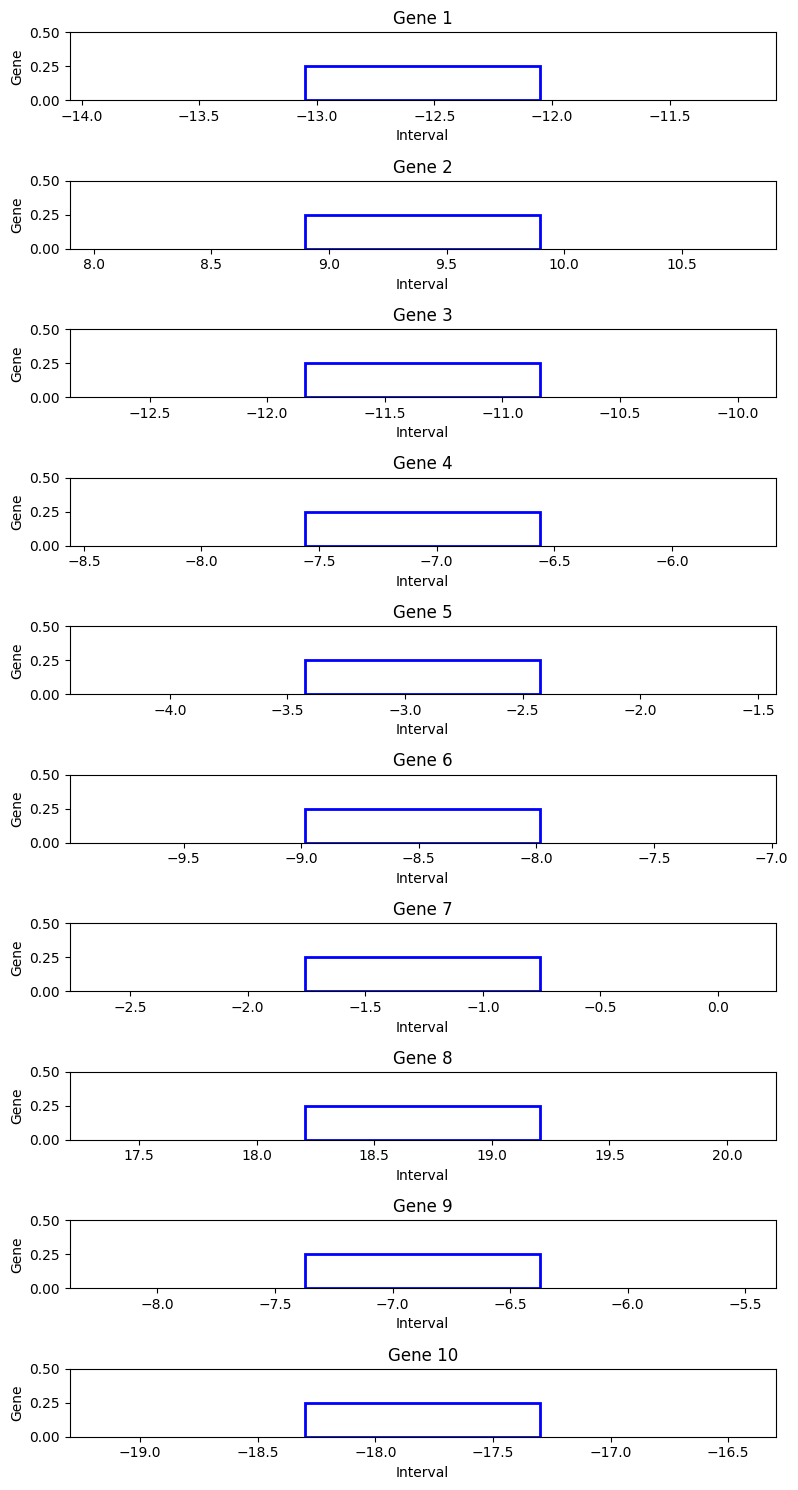

In [29]:
import matplotlib.pyplot as plt
# Plotting the genes as subplots
fig, axs = plt.subplots(num_genes, figsize=(8, num_genes*1.5))
for i, gene in enumerate(quantum_population):
    x_range = gene[0]
    y_range = gene[1]
    width = x_range[1] - x_range[0]
    height = y_range[1] - y_range[0]
    axs[i].add_patch(plt.Rectangle((x_range[0], y_range[0]), width, height, linewidth=2, edgecolor='b', facecolor='none'))
    axs[i].set_xlim(x_range[0] -1, x_range[1]+1)  # Setting x-axis limits
    axs[i].set_ylim(0, 0.5)  # Setting y-axis limits
    axs[i].set_title(f'Gene {i+1}')
    axs[i].set_xlabel('Interval')
    axs[i].set_ylabel('Gene')

plt.tight_layout()
plt.show()

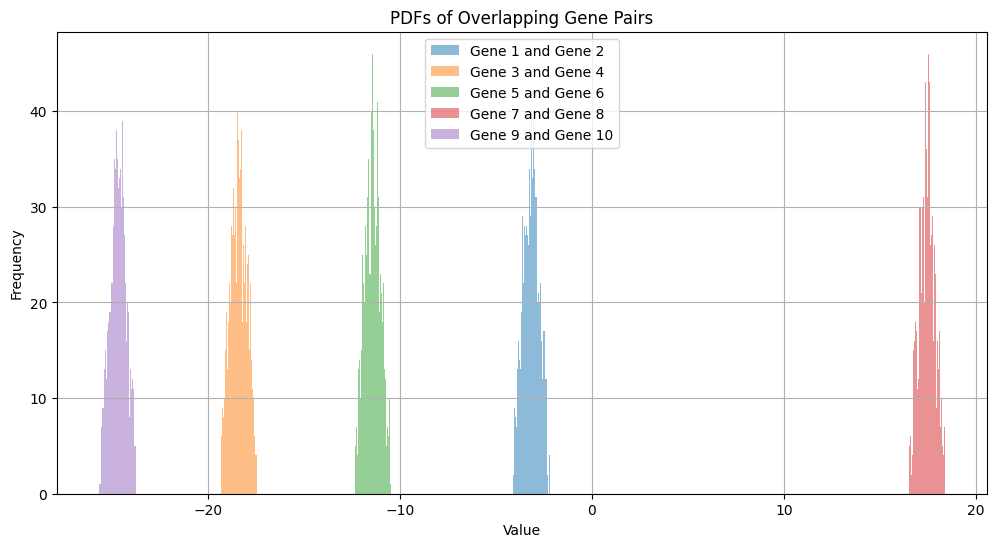

In [41]:
# Calculate the PDF by adding pairs of genes
pdfs = []
for i in range(0, len(quantum_population), 2):
    gene1 = quantum_population[i]
    gene2 = quantum_population[i + 1]

    x_range1, y_range1 = gene1
    x_range2, y_range2 = gene2

    # Generate PDF for Gene 1
    pdf1 = np.random.uniform(x_range1[0], x_range1[1], 1000)
    # Generate PDF for Gene 2
    pdf2 = np.random.uniform(x_range2[0], x_range2[1], 1000)
    # Sum the PDFs for interference effect
    pdf_sum = pdf1 + pdf2
    pdfs.append(pdf_sum)
#print(pdfs)
# Plot the PDFs
plt.figure(figsize=(12, 6))
for i, pdf in enumerate(pdfs):
    plt.hist(pdf, bins=50, alpha=0.5, label=f'Gene {2*i+1} and Gene {2*i+2}')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('PDFs of Overlapping Gene Pairs')
plt.legend()
plt.grid(True)
plt.show()

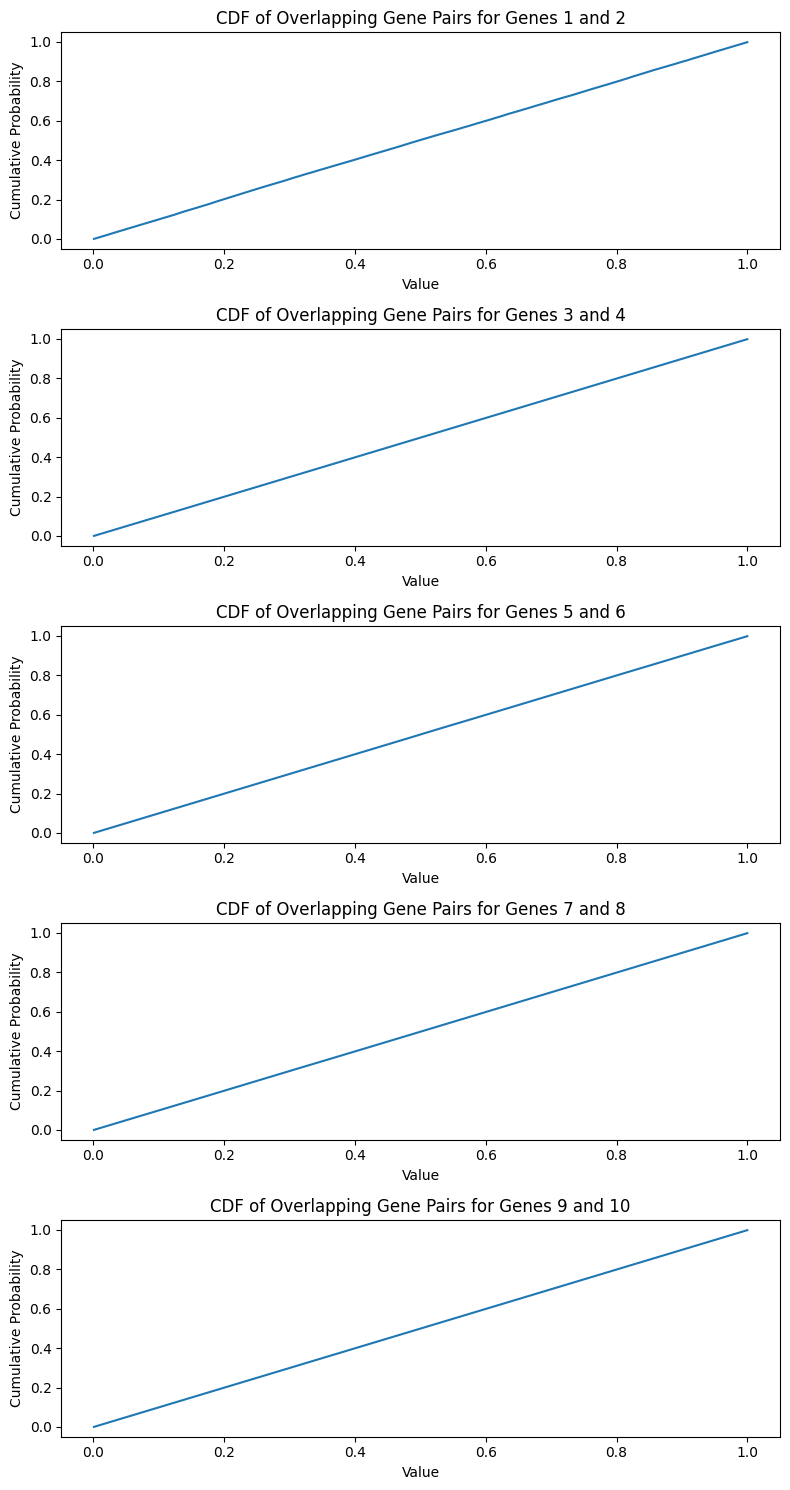

In [45]:
# Calculate the CDFs
cdfs = [np.cumsum(pdf) / np.sum(pdf) for pdf in pdfs]
#print(cdfs)
# Plot each CDF in subplots
num_genes = len(cdfs)
fig, axs = plt.subplots(num_genes, figsize=(8, num_genes*3))

for i, cdf in enumerate(cdfs):
    axs[i].plot(np.sort(cdf), np.linspace(0, 1, len(cdf), endpoint=False))
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Cumulative Probability')
    axs[i].set_title(f'CDF of Overlapping Gene Pairs for Genes {2*i+1} and {2*i+2}')

plt.tight_layout()
plt.show()

In [48]:
# Step 2: Convert Quantum to Classical

def convert_quantum_to_classical(quantum_population):
    classical_population = []
    for quantum_solution in quantum_population:
        classical_solution = []
        for variable_intervals in quantum_solution:
            interval_start, interval_end = variable_intervals
            # Create PDF for the variable
            pdf = np.random.uniform(interval_start, interval_end, 1000)
            # Append the PDF to the classical solution
            classical_solution.append(pdf)
        # Sum the PDFs for interference effect
        interference_pdf = sum(classical_solution)
        # Generate CDF from the interference PDF
        cdf = np.cumsum(interference_pdf) / np.sum(interference_pdf)
        # Sample from the CDF to get the classical solution
        classical_solution = np.interp(np.random.uniform(0, 1, 1000), cdf, pdf)
        classical_population.append(classical_solution)
    return classical_population

In [49]:
print(convert_quantum_to_classical(quantum_population))

[array([0.12459413, 0.11486199, 0.18122162, 0.18722429, 0.01143625,
       0.02993692, 0.24448478, 0.21934846, 0.07472432, 0.23259284,
       0.01866011, 0.15007558, 0.19992066, 0.03776671, 0.11625712,
       0.08165384, 0.11834729, 0.15205696, 0.22343105, 0.18738735,
       0.151852  , 0.08559334, 0.14331667, 0.07908477, 0.21885048,
       0.10753627, 0.10262848, 0.09995404, 0.11164827, 0.10087481,
       0.04144644, 0.22487633, 0.13169699, 0.16864634, 0.18160097,
       0.0447653 , 0.15621956, 0.15032536, 0.19186024, 0.03667393,
       0.20736188, 0.03674524, 0.16711391, 0.10995768, 0.03331171,
       0.07990464, 0.21438144, 0.1591295 , 0.10190048, 0.05962897,
       0.15896471, 0.1966578 , 0.13902564, 0.1475787 , 0.15261056,
       0.17220386, 0.21490802, 0.21591674, 0.0262564 , 0.1707809 ,
       0.06672692, 0.02324799, 0.1518203 , 0.08188759, 0.07943287,
       0.15282362, 0.0443896 , 0.17208558, 0.17056969, 0.12747174,
       0.17285193, 0.18095625, 0.08733701, 0.06963535, 0.0159

In [4]:
# Step 3: Perform Genetic Algorithm
import random

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness_value / total_fitness for fitness_value in fitness_values]

    random_number = random.uniform(0,1)

    cumulative = 0
    for i, prob in enumerate(probabilities):
        cumulative += prob
        if random_number <= cumulative:
            return population[i]
        
def crossover(parent1, parent2):
    min_length = min(len(parent1), len(parent2))
    crossover_point = np.random.randint(1, min_length)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2


def mutate(solution, mutation_rate):
    mutated_solution = []
    for gene in solution:
        if isinstance(gene, tuple):  # Check if gene is a tuple
            mutated_gene = (gene[0] + np.random.uniform(-0.1, 0.1), gene[1] + np.random.uniform(-0.1, 0.1))
        else:  # Assume gene is a scalar
            mutated_gene = gene + np.random.uniform(-0.1, 0.1)

        mutated_solution.append(mutated_gene)
    return mutated_solution

In [5]:
num_generations = 10
mutation_rate = 0.1

In [6]:
def perform_genetic_algorithm(quantum_population, num_generations, mutation_rate):
    best_solution = None
    best_fitness = float('inf')
    for generation in range(num_generations):
        # Convert quantum to classical
        classical_population = convert_quantum_to_classical(quantum_population)
        
        # Evaluate fitness
        fitness = [griewank_function(solution) for solution in classical_population]
        
        # Find the best solution in the current generation
        current_best_solution = classical_population[np.argmin(fitness)]
        current_best_fitness = min(fitness)
        
        # Update the best solution and best fitness if a new best is found
        if current_best_fitness < best_fitness:
            best_solution = current_best_solution
            best_fitness = current_best_fitness
            
        # Selection
        new_population = []
        for _ in range(len(quantum_population)):
            parent1 = roulette_wheel_selection(classical_population, fitness)
            parent2 = roulette_wheel_selection(classical_population, fitness)
            
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            
            # Mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            
            new_population.extend([child1, child2])
    
    return new_population, best_fitness, best_solution

In [7]:
from itertools import chain

def convert_to_quantum(classical_population):
    # Flatten the classical population
    flattened_population = list(chain.from_iterable(classical_population))

    # Normalize the flattened classical population
    total_fitness = sum(flattened_population)
    normalized_population = [fitness / total_fitness for fitness in flattened_population]

    # Calculate the cumulative distribution function (CDF)
    cdf = [sum(normalized_population[:i+1]) for i in range(len(normalized_population))]

    # Generate quantum population based on CDF
    quantum_population = []
    for _ in range(len(classical_population)):
        quantum_chromosome = []
        for _ in range(len(classical_population)):
            x_axis = np.random.uniform(-20, 20)
            y_axis = np.random.uniform(0, cdf[-1])
            for i in range(len(cdf)):
                if y_axis <= cdf[i]:
                    y_axis = i
                    break
            quantum_chromosome.append((x_axis, y_axis))
        quantum_population.append(quantum_chromosome)

    return quantum_population

'# Convert classical to quantum\nquantum_population = convert_to_quantum(best_solution)\nprint(f"Best solution in quantum: {quantum_population}")'

70.55574769684304
70.54940150712928
70.54940150712928
70.54940150712928
70.54140867609934
70.54140867609934
70.54140867609934
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.5378220807901
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53739292098335
70.53306296148166
70.53306296148166
70.53306296148166
70.53306296148166
70.53306296148166
70.

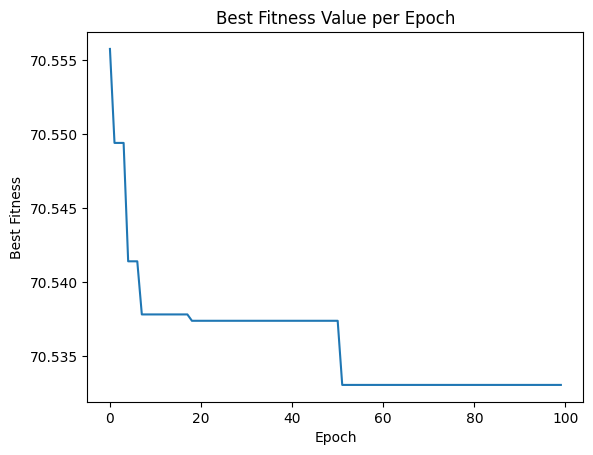

In [8]:
import matplotlib.pyplot as plt
# Run the genetic algorithm for 100 epochs
num_epochs = 100
best_fitnesses = []
best_solution, best_fitness = None, float('inf')
for epoch in range(num_epochs):
    new_population, new_fitness, new_solution = perform_genetic_algorithm(quantum_population, num_generations, mutation_rate)
    
    # Update the best solution and best fitness if a new best is found
    if new_fitness < best_fitness:
        best_solution, best_fitness = new_solution, new_fitness
    print(best_fitness)
    # Store the best fitness value at each epoch
    best_fitnesses.append(best_fitness)

print(f"Best Fitness: {best_fitness}, Best Solution: {best_solution}")

# Plot the best fitness value at each epoch
plt.plot(range(num_epochs), best_fitnesses)
plt.xlabel('Epoch')
plt.ylabel('Best Fitness')
plt.title('Best Fitness Value per Epoch')
plt.show()
